# Section 4 - Optimization and Gradients
## Notebook imports and packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


## Example 1 - simple cost function

### $$f(x) = x^2 + x + 1$$

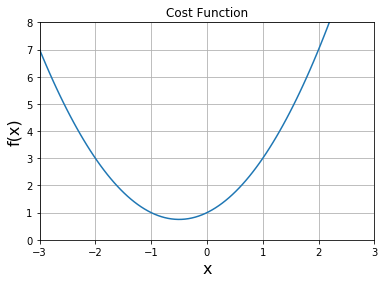

In [2]:
def f(x):
    return x**2 + x + 1

# Make some data
x_1 = np.linspace(start = - 3, stop = 3, num = 100)
#print(x_1[0:10])

plt.xlim([-3, 3])
plt.ylim(0,8)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.title('Cost Function')
plt.grid()
plt.plot(x_1, f(x_1))
plt.show()

## Slope and derivatives

In [3]:
def df(x):
    return 2*x + 1 # by power rule

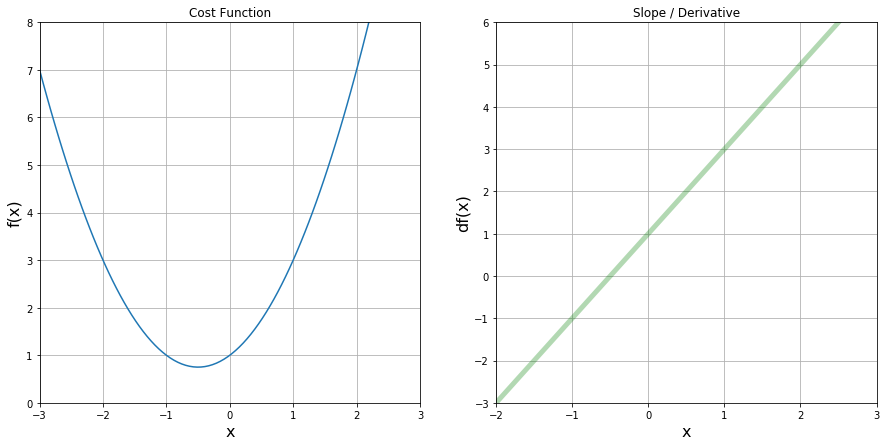

In [4]:
plt.figure(figsize = [15, 7])

# Plot 1
plt.subplot(1, 2, 1)
plt.xlim([-3, 3])
plt.ylim(0,8)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.title('Cost Function')
plt.grid()
plt.plot(x_1, f(x_1))

# Plot 2
plt.subplot(1, 2, 2)
plt.xlim([-2, 3])
plt.ylim(-3,6)
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.title('Slope / Derivative')
plt.grid()
plt.plot(x_1, df(x_1), color = "green", linewidth = 5, alpha = 0.3)

plt.show()

## Python loops and gradient descent

In [4]:
# Gradient descent
new_x = 3
prev_x = 0
learning_rate = 0.1
num_steps = 300
precision = 0.0001

x_values = [new_x]
slopes = [df(new_x)]

for n in range(num_steps):
    prev_x = new_x
    gradient = df(prev_x)
    new_x = prev_x - (learning_rate * gradient)
    step_size = abs(new_x - prev_x)
    
    x_values.append(new_x)
    slopes.append(df(new_x))
    if step_size < precision:
        print('Breaking at ', n, ' for precision')
        break
    
print('Found local min at: ', new_x)
print('df(x) at local min is: ', df(new_x))
print('f(x) or cost at local min is :', f(new_x))
#print(slopes)

Breaking at  40  for precision
Found local min at:  -0.49962781616118024
df(x) at local min is:  0.0007443676776395236
f(x) or cost at local min is : 0.7500001385208099


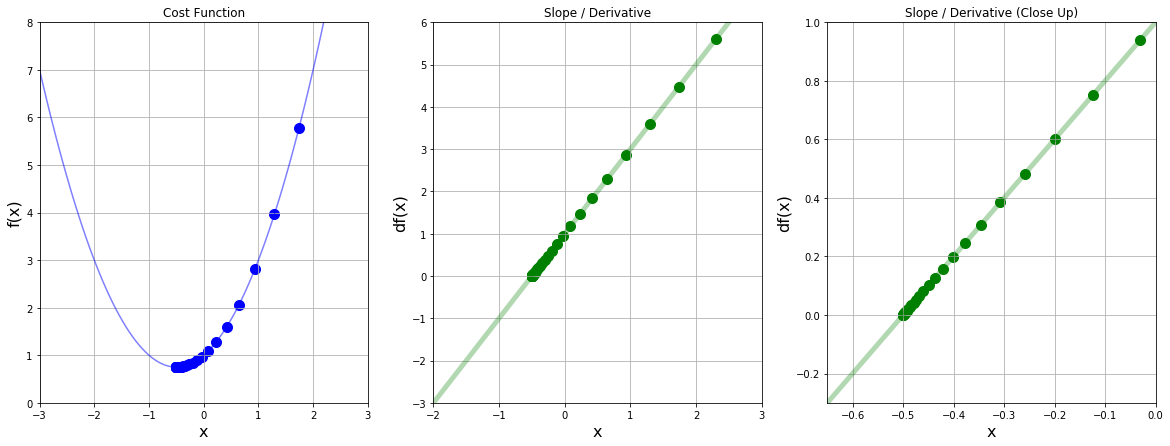

In [6]:
plt.figure(figsize = [20, 7])

# Plot 1
plt.subplot(1, 3, 1)
plt.xlim([-3, 3])
plt.ylim(0,8)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.title('Cost Function')
plt.grid()
plt.plot(x_1, f(x_1), color = 'blue', alpha = 0.5)
plt.scatter(x_values, f(np.array(x_values)), color = 'blue', s = 100)

# Plot 2
plt.subplot(1, 3, 2)
plt.xlim([-2, 3])
plt.ylim(-3,6)
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.title('Slope / Derivative')
plt.grid()
plt.plot(x_1, df(x_1), color = "green", linewidth = 5, alpha = 0.3)
plt.scatter(x_values, df(np.array(x_values)), color = 'green', s = 100)

# Plot 3
plt.subplot(1, 3, 3)
plt.xlim([-0.65, 0])
plt.ylim(-0.3,1)
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.title('Slope / Derivative (Close Up)')
plt.grid()
plt.plot(x_1, df(x_1), color = "green", linewidth = 5, alpha = 0.3)
plt.scatter(x_values, df(np.array(x_values)), color = 'green', s = 100)

plt.show()

## Example 2 - More advanced cost function

### $$g(x) = x^4 - 4x^2 + 5$$

In [5]:
# Make data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

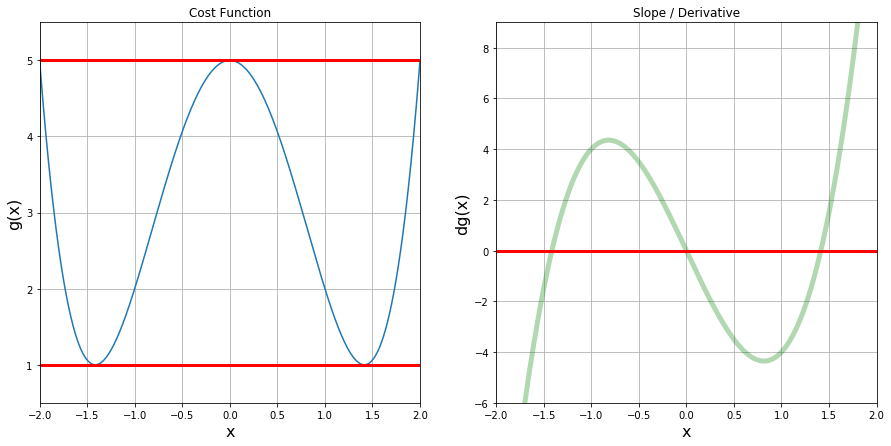

In [6]:
def h_line(x, y):
    return np.repeat(y, x.size)

plt.figure(figsize = [15, 7])

# Plot 1
plt.subplot(1, 2, 1)
plt.xlim([-2, 2])
plt.ylim(0.5, 5.5)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.title('Cost Function')
plt.grid()
plt.plot(x_2, g(x_2))
plt.plot(x_2, h_line(x_2, 5), color = "red", linewidth = 3)
plt.plot(x_2, h_line(x_2, 1), color = "red", linewidth = 3)

# Plot 2
plt.subplot(1, 2, 2)
plt.xlim([-2, 2])
plt.ylim(-6,9)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.title('Slope / Derivative')
plt.grid()
plt.plot(x_2, dg(x_2), color = "green", linewidth = 5, alpha = 0.3)
plt.plot(x_2, h_line(x_2, 0), color = "red", linewidth = 3, alpha = 1.0)

plt.show()

## Gradient descent as python function

In [7]:
# Gradient descent function

def gd(derivative_func, initial_guess, learning_rate = 0.02, precision = 0.0001, num_steps = 300):
    
    new_x = initial_guess
    x_values = [new_x]
    slopes = [derivative_func(new_x)]

    for n in range(num_steps):
        prev_x = new_x
        gradient = derivative_func(prev_x)
        new_x = prev_x - (learning_rate * gradient)
        step_size = abs(new_x - prev_x)

        x_values.append(new_x)
        slopes.append(derivative_func(new_x))
        if step_size < precision:
            print('Breaking at ', n, ' for precision < ', precision)
            break
            
    return new_x, x_values, slopes

In [8]:
local_min, list_x, deriv_list = gd(dg, initial_guess = -0.1)
print('Local min occurs at:', local_min)
print('Number of steps: ', len(list_x))

Breaking at  38  for precision <  0.0001
Local min occurs at: -1.4140028587882567
Number of steps:  40


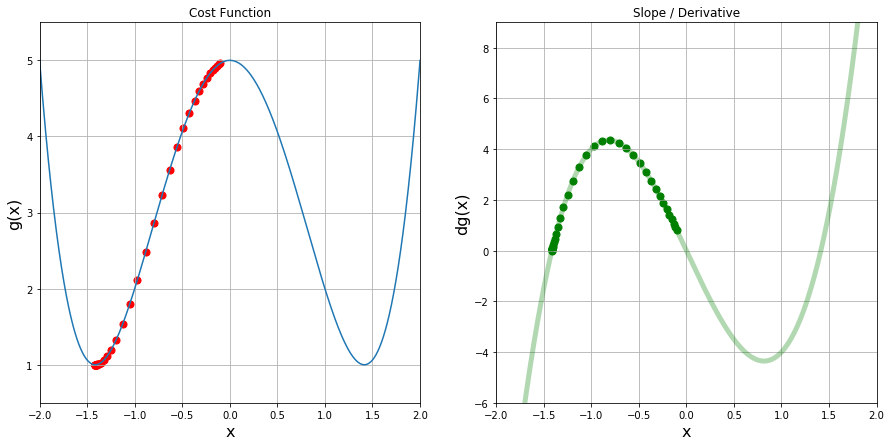

In [9]:
plt.figure(figsize = [15, 7])

# Plot 1
plt.subplot(1, 2, 1)
plt.xlim([-2, 2])
plt.ylim(0.5, 5.5)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.title('Cost Function')
plt.grid()
plt.plot(x_2, g(x_2))
#plt.plot(x_2, h_line(x_2, 5), color = "red", linewidth = 3)
#plt.plot(x_2, h_line(x_2, 1), color = "red", linewidth = 3)
plt.scatter(list_x, g(np.array(list_x)), color = "red", s = 50)

# Plot 2
plt.subplot(1, 2, 2)
plt.xlim([-2, 2])
plt.ylim(-6,9)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.title('Slope / Derivative')
plt.grid()
plt.plot(x_2, dg(x_2), color = "green", linewidth = 5, alpha = 0.3)
#plt.plot(x_2, h_line(x_2, 0), color = "red", linewidth = 3, alpha = 1.0)
plt.scatter(list_x, np.array(deriv_list), color = "green", s = 50)


plt.show()

In [10]:
local_min, list_x, deriv_list = gd(dg, initial_guess = 0.5)
print('Local min occurs at:', local_min)
print('Number of steps: ', len(list_x))

Breaking at  27  for precision <  0.0001
Local min occurs at: 1.4140176512739588
Number of steps:  29


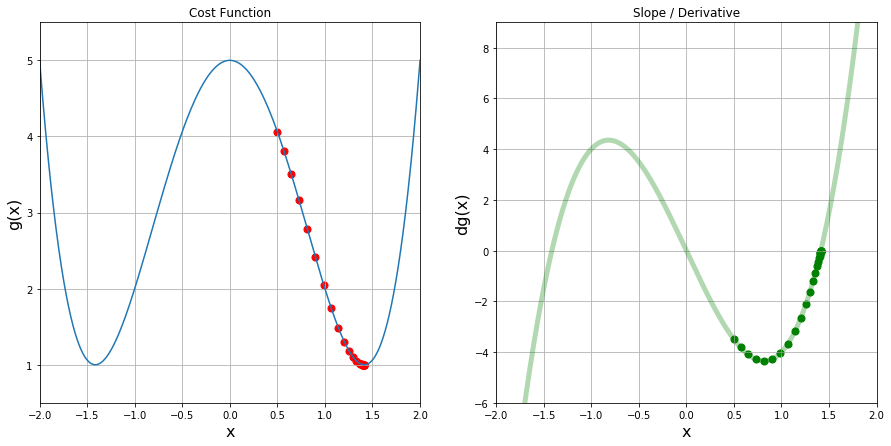

In [11]:
plt.figure(figsize = [15, 7])

# Plot 1
plt.subplot(1, 2, 1)
plt.xlim([-2, 2])
plt.ylim(0.5, 5.5)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.title('Cost Function')
plt.grid()
plt.plot(x_2, g(x_2))
#plt.plot(x_2, h_line(x_2, 5), color = "red", linewidth = 3)
#plt.plot(x_2, h_line(x_2, 1), color = "red", linewidth = 3)
plt.scatter(list_x, g(np.array(list_x)), color = "red", s = 50)

# Plot 2
plt.subplot(1, 2, 2)
plt.xlim([-2, 2])
plt.ylim(-6,9)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.title('Slope / Derivative')
plt.grid()
plt.plot(x_2, dg(x_2), color = "green", linewidth = 5, alpha = 0.3)
#plt.plot(x_2, h_line(x_2, 0), color = "red", linewidth = 3, alpha = 1.0)
plt.scatter(list_x, np.array(deriv_list), color = "green", s = 50)


plt.show()

In [12]:
local_min, list_x, deriv_list = gd(dg, initial_guess = 0)
print('Local min occurs at:', local_min)
print('Number of steps: ', len(list_x))

Breaking at  0  for precision <  0.0001
Local min occurs at: 0.0
Number of steps:  2


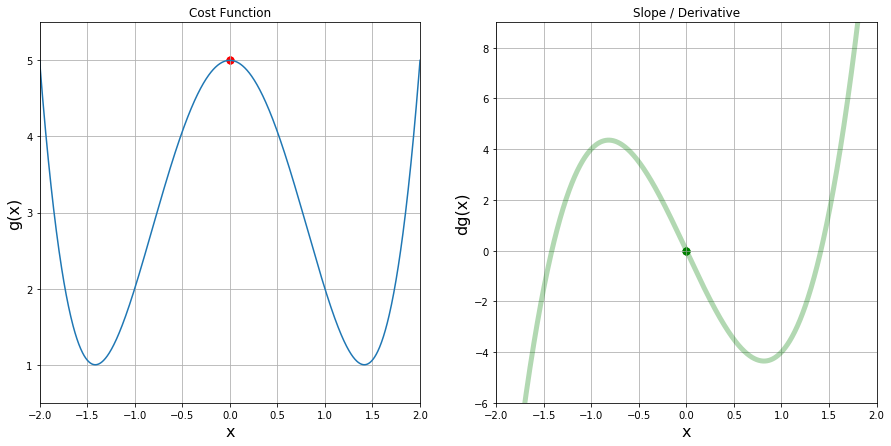

In [13]:
plt.figure(figsize = [15, 7])

# Plot 1
plt.subplot(1, 2, 1)
plt.xlim([-2, 2])
plt.ylim(0.5, 5.5)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.title('Cost Function')
plt.grid()
plt.plot(x_2, g(x_2))
#plt.plot(x_2, h_line(x_2, 5), color = "red", linewidth = 3)
#plt.plot(x_2, h_line(x_2, 1), color = "red", linewidth = 3)
plt.scatter(list_x, g(np.array(list_x)), color = "red", s = 50)

# Plot 2
plt.subplot(1, 2, 2)
plt.xlim([-2, 2])
plt.ylim(-6,9)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.title('Slope / Derivative')
plt.grid()
plt.plot(x_2, dg(x_2), color = "green", linewidth = 5, alpha = 0.3)
#plt.plot(x_2, h_line(x_2, 0), color = "red", linewidth = 3, alpha = 1.0)
plt.scatter(list_x, np.array(deriv_list), color = "green", s = 50)


plt.show()

# Example 3 - Divergence, Overflow & Tuples
## $$h(x) = x^5 - 2x^4 +2$$

In [14]:
# Start Lesson 38
# Make data
x_3 = np.linspace(start = -2.5, stop = 2.5, num = 1000)
def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

Breaking at  119  for precision <  0.0001
Local min:  1.5998724702484226
Cost at min:  -0.6214398334848514


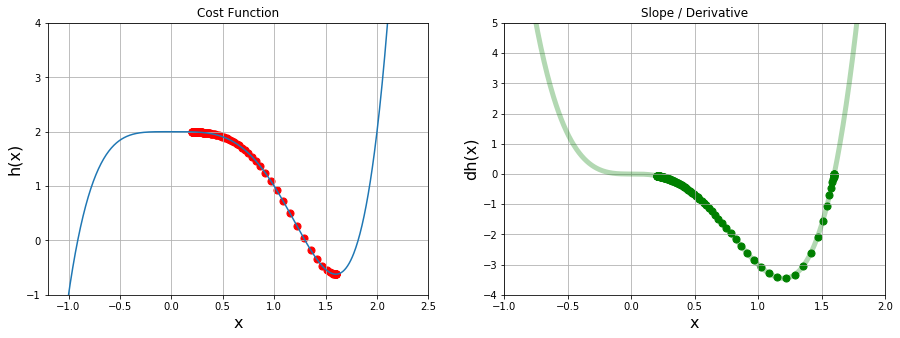

In [15]:
local_min, list_x, deriv_list = gd(dh, initial_guess = 0.2)

plt.figure(figsize = [15, 5])

# Plot 1
plt.subplot(1, 2, 1)
plt.xlim([-1.2, 2.5])
plt.ylim(-1, 4)
plt.xlabel('x', fontsize=16)
plt.ylabel('h(x)', fontsize=16)
plt.title('Cost Function')
plt.grid()
plt.plot(x_3, h(x_3))
plt.scatter(list_x, h(np.array(list_x)), color = "red", s = 50)

# Plot 2
plt.subplot(1, 2, 2)
plt.xlim([-1, 2])
plt.ylim(-4,5)
plt.xlabel('x', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.title('Slope / Derivative')
plt.grid()
plt.plot(x_3, dh(x_3), color = "green", linewidth = 5, alpha = 0.3)
plt.scatter(list_x, np.array(deriv_list), color = "green", s = 50)

print('Local min: ', local_min)
print('Cost at min: ', h(local_min))
plt.show()

Local min:  -1.8398461123332792e+24
Cost at min:  -2.1081790694225687e+121
Steps: 72


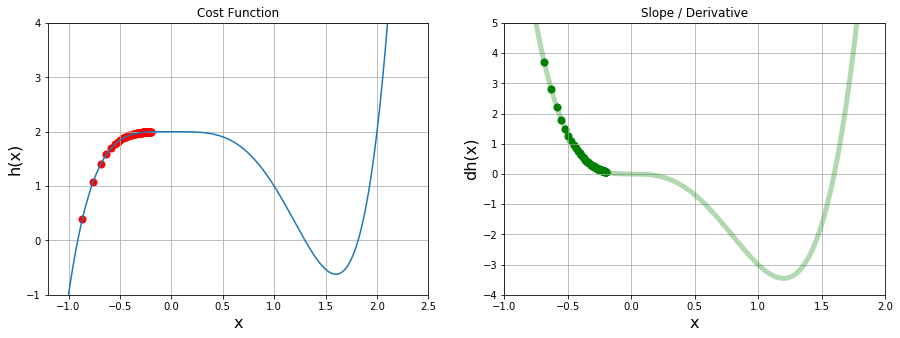

In [16]:
local_min, list_x, deriv_list = gd(dh, initial_guess = -0.2, num_steps = 71)

plt.figure(figsize = [15, 5])

# Plot 1
plt.subplot(1, 2, 1)
plt.xlim([-1.2, 2.5])
plt.ylim(-1, 4)
plt.xlabel('x', fontsize=16)
plt.ylabel('h(x)', fontsize=16)
plt.title('Cost Function')
plt.grid()
plt.plot(x_3, h(x_3))
plt.scatter(list_x, h(np.array(list_x)), color = "red", s = 50)

# Plot 2
plt.subplot(1, 2, 2)
plt.xlim([-1, 2])
plt.ylim(-4,5)
plt.xlabel('x', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.title('Slope / Derivative')
plt.grid()
plt.plot(x_3, dh(x_3), color = "green", linewidth = 5, alpha = 0.3)
plt.scatter(list_x, np.array(deriv_list), color = "green", s = 50)


print('Local min: ', local_min)
print('Cost at min: ', h(local_min))
print('Steps:', len(list_x))
plt.show()

In [17]:
import sys
print(sys.version)
type(h(local_min))
sys.float_info.max

3.5.4 |Anaconda custom (64-bit)| (default, Oct 13 2017, 11:22:58) 
[GCC 7.2.0]


1.7976931348623157e+308

# Python Tuples

In [18]:
# creating a tuple
breakfest = 'bacon', 'eggs', 'avocado', 'toast'
type(breakfest)
unlucky_numbers = 0, 13, 666
print(unlucky_numbers[2], 'is unlucky')
print('I love ' + breakfest[0])

# tuples are immutable
breakfast[1] = 'cereal'

666 is unlucky
I love bacon


NameError: name 'breakfast' is not defined

In [19]:
tuple_with_single_value = 42,
print(tuple_with_single_value[0])

42


In [20]:
# unpacking tuples
one, two, three = unlucky_numbers
print(one, two, three)

0 13 666


In [21]:
data_tuple = gd(dh, initial_guess=0.2)
print(data_tuple[0], len(data_tuple[1]))

Breaking at  119  for precision <  0.0001
1.5998724702484226 121


In [22]:
# finish lesson 38

# The Learning Rate

Local min occurs at: 1.289286595470764
Number of steps:  301


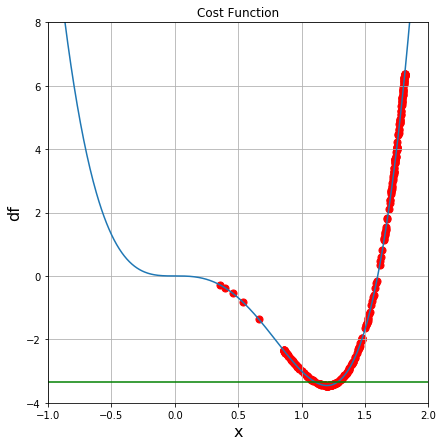

In [23]:
def plot_gd(xdata, df, ig = 1.9, lr = 0.15, precision = 0.0001, ns = 300,
           fg = [15,7], xl = [-2,2], yl = [-7, 7]):

    local_min, list_x, deriv_list = gd(df, initial_guess = ig, learning_rate = lr, num_steps = ns)
    
    print('Local min occurs at:', local_min)
    print('Number of steps: ', len(list_x))
    
    plt.figure(figsize = fg)
    
    plt.subplot(1, 2, 1)
    plt.xlim(xl)
    plt.ylim(yl)
    plt.xlabel('x', fontsize=16)
    plt.ylabel('df', fontsize=16)
    plt.title('Cost Function')
    plt.grid()
    plt.plot(xdata, df(xdata))
    plt.scatter(list_x, df(np.array(list_x)), color = "red", s = 50)
    plt.plot(xdata, h_line(xdata, df(local_min)), color = "green", linewidth = 1.5)
    plt.show()


def f_x(x):
    return x**5 - 2*x**4 + 2

def f_prime_x(x):
    return 5*x**4 - 8*x**3

xdata = np.linspace(start = -2.5, stop = 2.5, num = 1000)

plot_gd(xdata, f_prime_x, xl = [-1, 2], yl = [-4, 8])
